In [11]:
from google.colab import files

uploaded = files.upload()

Saving Brasileirao_Matches.csv to Brasileirao_Matches.csv


In [12]:
# 🏟️ Home Advantage Analysis in Brasileirão

# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Settings
sns.set(style="whitegrid")

In [14]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Brasileirao_Matches.csv']))
display(df)

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1
...,...,...,...,...,...,...,...,...,...
4175,2022-11-13 16:00:00,Internacional-RS,RS,Palmeiras-SP,SP,NaN,NaN,2022,38
4176,2022-11-13 16:00:00,Ceara-CE,CE,Juventude-RS,RS,NaN,NaN,2022,38
4177,2022-11-13 16:00:00,Goias-GO,GO,Sao Paulo-SP,SP,NaN,NaN,2022,38
4178,2022-11-13 16:00:00,Cuiaba-MT,MT,Coritiba-PR,PR,NaN,NaN,2022,38


In [15]:
# 📅 Convert dates
df['datetime'] = pd.to_datetime(df['datetime'])
display(df)

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1
...,...,...,...,...,...,...,...,...,...
4175,2022-11-13 16:00:00,Internacional-RS,RS,Palmeiras-SP,SP,NaN,NaN,2022,38
4176,2022-11-13 16:00:00,Ceara-CE,CE,Juventude-RS,RS,NaN,NaN,2022,38
4177,2022-11-13 16:00:00,Goias-GO,GO,Sao Paulo-SP,SP,NaN,NaN,2022,38
4178,2022-11-13 16:00:00,Cuiaba-MT,MT,Coritiba-PR,PR,NaN,NaN,2022,38


In [16]:
df_clean = df.dropna(subset=['home_goal', 'away_goal']).copy()
df_clean['home_goal'] = df_clean['home_goal'].astype(int)
df_clean['away_goal'] = df_clean['away_goal'].astype(int)
df_clean['goal_diff'] = df_clean['home_goal'] - df_clean['away_goal']
df_clean['year'] = df_clean['datetime'].dt.year


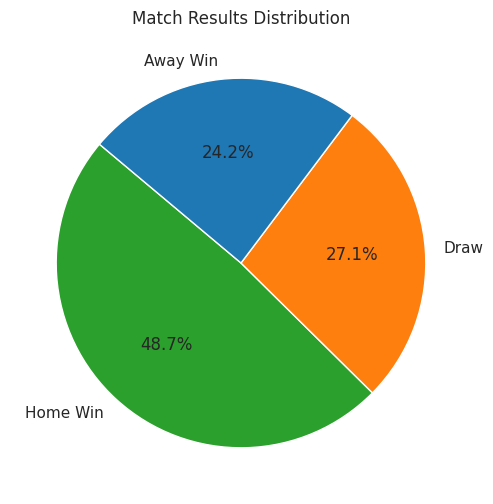

<ipython-input-17-a0d3cc10ca99>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Home', 'Away'], y=[avg_home_goals, avg_away_goals], palette=['#2ca02c', '#1f77b4'])


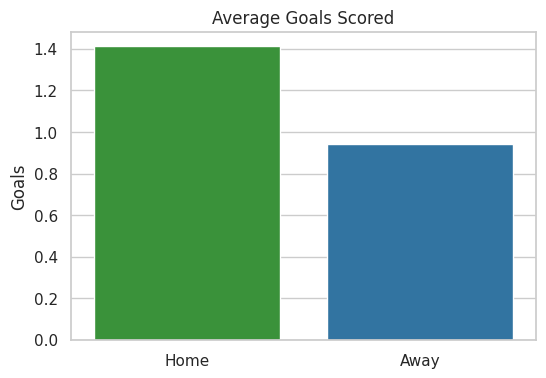

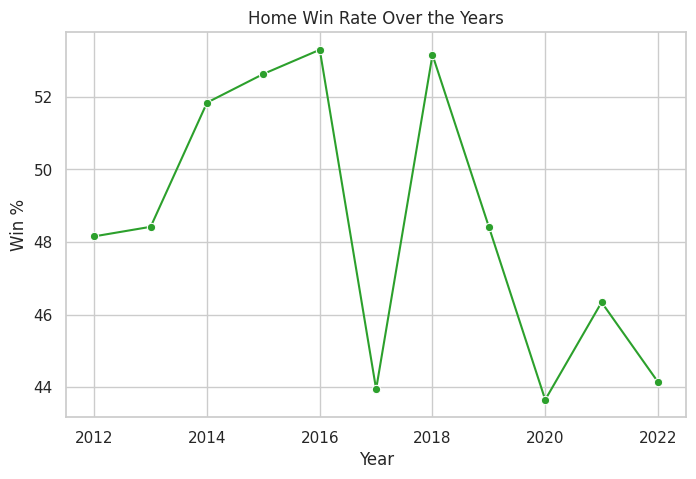

<ipython-input-17-a0d3cc10ca99>:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_teams = df_clean.groupby('home_team').apply(lambda x: (x['result'] == 'Home Win').sum() / len(x) * 100).sort_values(ascending=False).head(10).reset_index(name='home_win_percentage')
<ipython-input-17-a0d3cc10ca99>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x='home_team', y='home_win_percentage', palette='viridis')


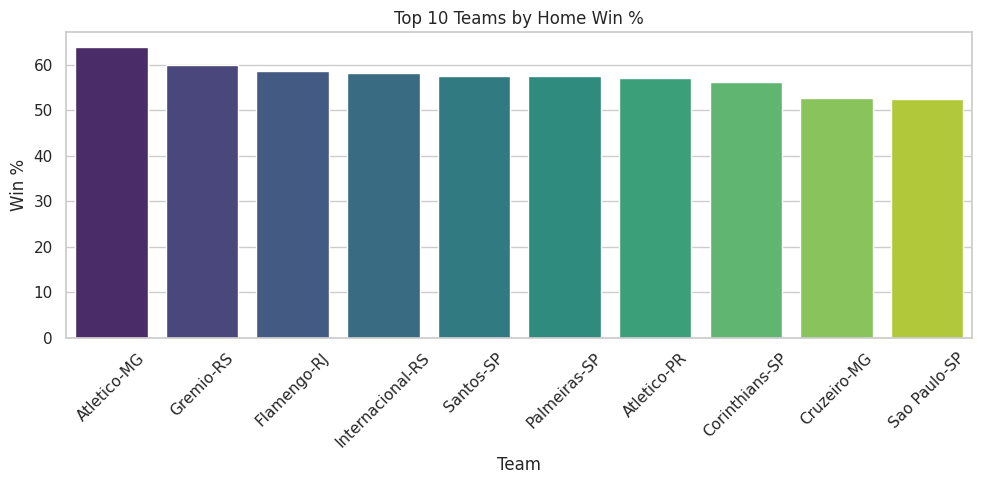

In [17]:
def get_result(row):
    if row['goal_diff'] > 0:
        return 'Home Win'
    elif row['goal_diff'] < 0:
        return 'Away Win'
    else:
        return 'Draw'

df_clean['result'] = df_clean.apply(get_result, axis=1)

# 📊 Win Distribution
result_counts = df_clean['result'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
colors = ['#2ca02c', '#ff7f0e', '#1f77b4']
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Match Results Distribution')
plt.show()

# ⚽ Average Goals
avg_home_goals = df_clean['home_goal'].mean()
avg_away_goals = df_clean['away_goal'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=['Home', 'Away'], y=[avg_home_goals, avg_away_goals], palette=['#2ca02c', '#1f77b4'])
plt.title('Average Goals Scored')
plt.ylabel('Goals')
plt.show()

# 📈 Trend Over Years
home_win_trend = df_clean[df_clean['result'] == 'Home Win'].groupby('year').size() / df_clean.groupby('year').size() * 100
plt.figure(figsize=(8, 5))
sns.lineplot(x=home_win_trend.index, y=home_win_trend.values, marker='o', color='#2ca02c')
plt.title('Home Win Rate Over the Years')
plt.ylabel('Win %')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# 🏆 Top Home Teams
top_teams = df_clean.groupby('home_team').apply(lambda x: (x['result'] == 'Home Win').sum() / len(x) * 100).sort_values(ascending=False).head(10).reset_index(name='home_win_percentage')
plt.figure(figsize=(10, 5))
sns.barplot(data=top_teams, x='home_team', y='home_win_percentage', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Teams by Home Win %')
plt.ylabel('Win %')
plt.xlabel('Team')
plt.tight_layout()
plt.show()
